In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df= pd.read_csv("/kaggle/input/exploratory-data-analysis/train.csv")


In [15]:
# --- 1. Handle Missing Values ---
# Fill Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill Embarked with mode (most common port)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin only if it exists
df = df.drop(columns=['Cabin'], errors='ignore')

# --- 2. Convert Data Types ---
df['Survived'] = df['Survived'].astype(int)        # numeric for calculations
df['Pclass']   = df['Pclass'].astype('category')   # categorical
df['Sex']      = df['Sex'].astype('category')      # categorical
df['Embarked'] = df['Embarked'].astype('category') # categorical

# --- 3. Check column data types (safety check) ---
print(df.dtypes)



PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
dtype: object


In [18]:

# --- 4. Summary Statistics ---
print("\nSummary statistics:")
print(df.describe())

# Survival rate by gender
print("\nSurvival rate by gender:")
print(df.groupby('Sex', observed=True)['Survived'].mean())

# Survival rate by passenger class
print("\nSurvival rate by passenger class:")
print(df.groupby('Pclass', observed=True)['Survived'].mean())

# Survival rate by gender and class
print("\nSurvival rate by gender and class:")
print(df.groupby(['Sex', 'Pclass'], observed=True)['Survived'].mean())


Summary statistics:
       PassengerId    Survived         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838   29.361582    0.523008    0.381594   32.204208
std     257.353842    0.486592   13.019697    1.102743    0.806057   49.693429
min       1.000000    0.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    0.000000   22.000000    0.000000    0.000000    7.910400
50%     446.000000    0.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    1.000000   35.000000    1.000000    0.000000   31.000000
max     891.000000    1.000000   80.000000    8.000000    6.000000  512.329200

Survival rate by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival rate by passenger class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival rate by gender and class:
Sex     Pclass
fem

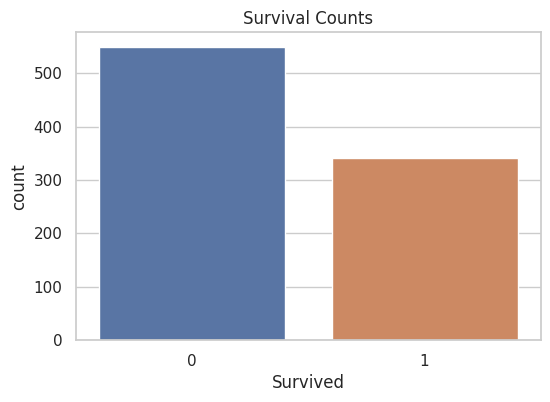

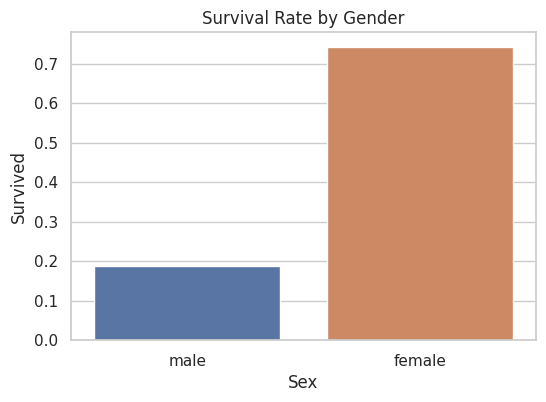

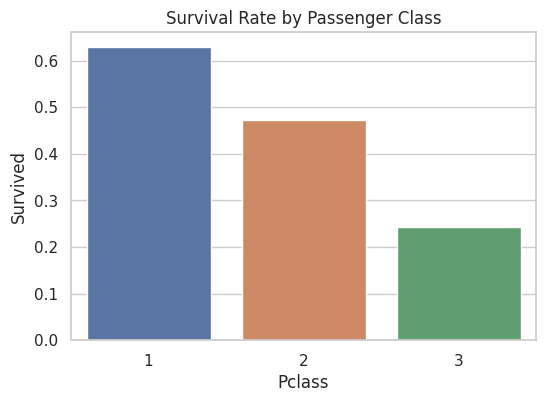

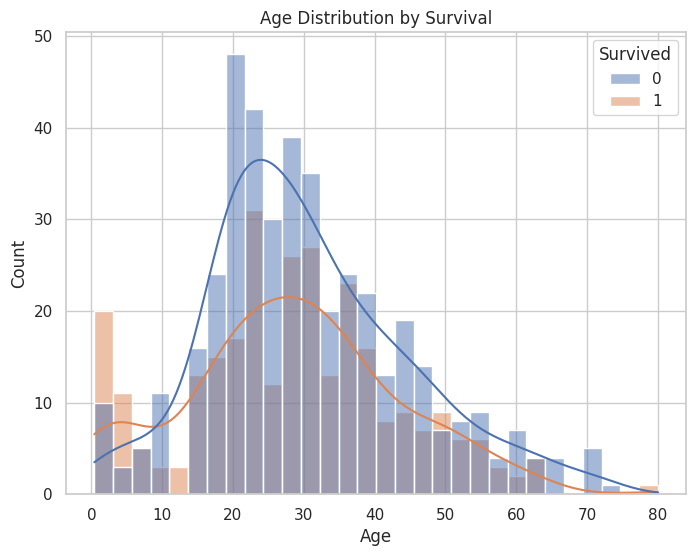

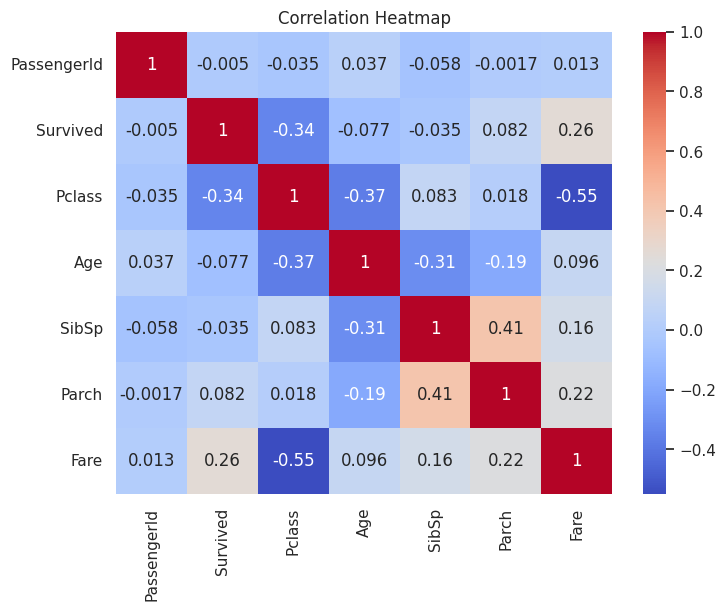

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Survival Count Plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Survived')
plt.title("Survival Counts")
plt.show()

# Survival by Gender
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Sex', y='Survived', errorbar=None)
plt.title("Survival Rate by Gender")
plt.show()

# Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Pclass', y='Survived', errorbar=None)
plt.title("Survival Rate by Passenger Class")
plt.show()

# Age Distribution by Survival
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
